In [198]:
# Necessary libraries 
import SimpleITK as sitk
import skimage as skimg
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
import dicom2nifti
import os 
import fnmatch


In [199]:
# Hard-coded variables

ref_img_path      =        '/Users/lalith/Documents/PANDA-gradient-images/Gradient-image-37.nii'
grad_img_path     =        '/Users/lalith/Documents/PANDA-gradient-images/'
src_se_list       =        []
epsilon           =        1.25
total_num_files   =        (len(fnmatch.filter(os.listdir(grad_img_path), '*.nii')))
pet_frames        =        np.arange(1,total_num_files+1)

In [ ]:
# The part that measures shannon-entropy for structural finger-printing

itk_fixed=sitk.ReadImage(ref_img_path)
for x in tqdm(range(1,(total_num_files+1))):
    pass
    itk_moved=sitk.ReadImage(grad_img_path+'/Gradient-image-'+str(x)+'.nii');
    moved_img= sitk.GetArrayFromImage(itk_moved)
    fixed_img=sitk.GetArrayFromImage(itk_fixed)
    ssim_3d_sk = skimg.measure.compare_ssim(moved_img, fixed_img, multichannel=False, gaussian_weights=True, data_range=1.0, use_sample_covariance=False)
    nrmse=skimg.measure.compare_nrmse(moved_img,fixed_img)
    src_se=skimg.measure.shannon_entropy(moved_img, base=2)
    src_se_list.append(src_se)
    ref_se=skimg.measure.shannon_entropy(fixed_img, base=2)
    
src_shannon_val                             =     np.array(src_se_list)
ref_shannon_val                             =     np.array(ref_se)
similarity_shannon                          =     np.array(abs(ref_shannon_val-src_shannon_val))
selected_frames                             =     similarity_shannon<epsilon # Lesser it is better similarity
frames_where_gans_can_be_applied            =     np.where(selected_frames==True)


 70%|███████   | 26/37 [01:50<00:47,  4.28s/it]

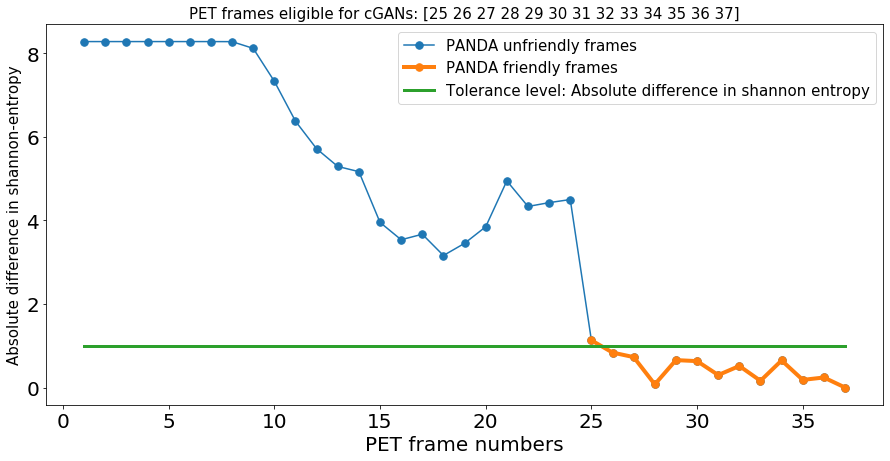

In [194]:
# Plot them all.
plt.rcParams['figure.figsize'] = [15, 7]
plt.title('PET frames eligible for cGANs: '+ str(pet_frames[similarity_shannon<epsilon]),size=15)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.plot(pet_frames,similarity_shannon,'.-',markersize=15,label='PANDA unfriendly frames')
plt.plot(pet_frames[selected_frames],similarity_shannon[selected_frames],'.-',linewidth=4,markersize=15,label='PANDA friendly frames')
plt.plot(pet_frames,epsilon*np.ones(total_num_files),linewidth=3,label='Tolerance level: Absolute difference in shannon entropy')
plt.xlabel('PET frame numbers',size=20)
plt.ylabel('Absolute difference in shannon-entropy', size=15)
plt.legend(loc="upper right",prop={"size":15})
plt.show()


In [ ]:
similarity_shannon

In [168]:
similarity_shannon[24]

1.1296721335101667

In [169]:
pet_frames

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37])

In [170]:
selected_frames

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True])

In [ ]:
selected_frames[0]